## Telecom churn

### About data

    - contract_new.csv — contract info;
    - personal_new.csv — personal data;
    - internet_new.csv — internet data;
    - phone_new.csv — phone data.

#### contract_new.csv
customerID;
BeginDate — start contract;
EndDate — end contract;
Type — type of payment;
PaperlessBilling — e-bill;
PaymentMethod — payment method;
MonthlyCharges;
TotalCharges.

#### Файл personal_new.csv

customerID ;
gender;
SeniorCitizen;
Partner;
Dependents.

#### Файл internet_new.csv

customerID ;
InternetService — type of internet connection;
OnlineSecurity;
OnlineBackup;
DeviceProtection — antivirus;
TechSupport;
StreamingTV;
StreamingMovies.


#### Файл phone_new.csv

customerID;
MultipleLines.

#### additional info

Info about contracts till 2020.02.01

## Plan of work:

1. Data loading
2. Exploratory data analysis and data preprocessing
3. Data merging
4. Exploratory data analysis and preprocessing of the merged dataframe
5. Data preparation
6. Machine learning model training
7. Model selection
8. Overall conclusion and recommendations

## Data loading


In [1]:
!pip install phik


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import roc_curve, auc


import phik
from phik import resources, report
from phik import phik_matrix

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score

from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


### Contract_new

In [6]:
contract_new = pd.read_csv('contract_new.csv')
contract_new

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.8


In [7]:
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [8]:
contract_new.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


#### Conclusions on contract_new
BeginDate - change to time type.
EndDate - change to time type. Get target feature out of it.
TotalCharges - change to float type.

7043 rows

No missing values

### Internet_new

In [9]:
internet_new = pd.read_csv('internet_new.csv')
internet_new

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [10]:
internet_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


#### Conclusions on internet_new

No missing values
Rows -  5517


### Personal_new

In [11]:
personal_new = pd.read_csv('personal_new.csv')
personal_new

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [12]:
personal_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


#### Conclusions on personal_new
7043 - rows

### Phone_new

In [13]:
phone_new = pd.read_csv('phone_new.csv')
phone_new

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [14]:
phone_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


#### Conclusions on phone_new

6361 - rows

### Conclusions on Loading data

Max rows - 7043
Get target from EndDate
Get new feature from Begindate and end date how many days client was signed
Change some features to the right type
Get feature names to snake case


## EDA

### Contract_new

In [15]:
def to_snake_case(column_names):
    snake_case_names = []
    for name in column_names:
        if name.lower() == "customerid":
            snake_case_name = "customer_id"
        else:
            snake_case_name = ''.join(['_' + c.lower() if c.isupper() else c for c in name]).lstrip('_')
        snake_case_names.append(snake_case_name)
    return snake_case_names

In [16]:
def plot_pie_chart(dataframe, column_name):
    column_counts = dataframe[column_name].value_counts()
    column_counts.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'{column_name} Distribution')
    plt.axis('off')
    plt.show()

In [17]:
def plot_histogram(dataframe, column_name, bins=20):
    column_data = dataframe[column_name]
    plt.hist(column_data, bins=bins, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}')
    plt.show()

In [18]:
def build_box_plot(dataframe, column_name):
    plt.figure(figsize=(10, 6)) 
    plt.boxplot(dataframe[column_name])
    plt.title(f'Box Plot for {column_name}')
    plt.xlabel(column_name)
    plt.show()

In [19]:
contract_new.columns = to_snake_case(contract_new.columns)
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [20]:
contract_new.total_charges = pd.to_numeric(contract_new.total_charges, errors='coerce')
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


Lost 11 rows in total charges. Lets have a look

In [21]:
contract_new[contract_new['total_charges'].isnull()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


Those customers just signed contracts. No total charges were paid. We can delete those rows.

In [22]:
contract_new = contract_new.dropna()
contract_new

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.20
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.40
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.60
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.80


In [24]:
# get target from end date
contract_new['churn'] = contract_new['end_date'].apply(lambda x:0 if x.lower()== 'no' else 1)
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   begin_date         7032 non-null   object 
 2   end_date           7032 non-null   object 
 3   type               7032 non-null   object 
 4   paperless_billing  7032 non-null   object 
 5   payment_method     7032 non-null   object 
 6   monthly_charges    7032 non-null   float64
 7   total_charges      7032 non-null   float64
 8   churn              7032 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 549.4+ KB


/var/folders/gh/ycp1_w4n7ws8z82zzcg04g180000gn/T/ipykernel_30888/2016789484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_new['churn'] = contract_new['end_date'].apply(lambda x:0 if x.lower()== 'no' else 1)


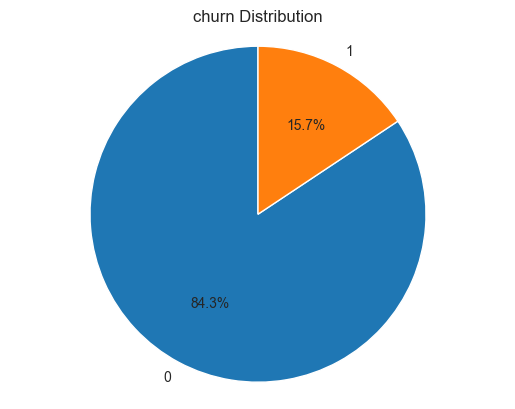

churn
0    5931
1    1101
Name: count, dtype: int64

In [25]:
plot_pie_chart(contract_new, 'churn')
contract_new['churn'].value_counts()

In [26]:
contract_new['begin_date'] = pd.to_datetime(contract_new['begin_date'])
contract_new['end_date'] = pd.to_datetime(contract_new['end_date'], errors='coerce')
contract_new['end_date'].fillna(pd.to_datetime('2020-02-01'), inplace=True)

/var/folders/gh/ycp1_w4n7ws8z82zzcg04g180000gn/T/ipykernel_30888/639852169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_new['begin_date'] = pd.to_datetime(contract_new['begin_date'])
/var/folders/gh/ycp1_w4n7ws8z82zzcg04g180000gn/T/ipykernel_30888/639852169.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract_new['end_date'] = pd.to_datetime(contract_new['end_date'], errors='coerce')
/var/folders/gh/ycp1_w4n7ws8z82zzcg04g180000gn/T/ipykernel_30888/639852169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [27]:
contract_new

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.20,0
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.40,0
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.60,0
7041,8361-LTMKD,2019-07-01,2020-02-01,Month-to-month,Yes,Mailed check,74.40,520.80,0


In [28]:
contract_new['days_stayed'] = (contract_new['end_date'] - contract_new['begin_date']).dt.days
contract_new

/var/folders/gh/ycp1_w4n7ws8z82zzcg04g180000gn/T/ipykernel_30888/1277121589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_new['days_stayed'] = (contract_new['end_date'] - contract_new['begin_date']).dt.days


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,days_stayed
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.20,0,730
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.40,0,2191
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.60,0,337
7041,8361-LTMKD,2019-07-01,2020-02-01,Month-to-month,Yes,Mailed check,74.40,520.80,0,215


In [29]:
_ = ['begin_date', 'end_date']
contract_new = contract_new.drop(columns=_)
contract_new

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,days_stayed
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,One year,Yes,Mailed check,84.80,2035.20,0,730
7039,2234-XADUH,One year,Yes,Credit card (automatic),103.20,7430.40,0,2191
7040,4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,325.60,0,337
7041,8361-LTMKD,Month-to-month,Yes,Mailed check,74.40,520.80,0,215


Deleted enddate and begin date and got new feature out of it.

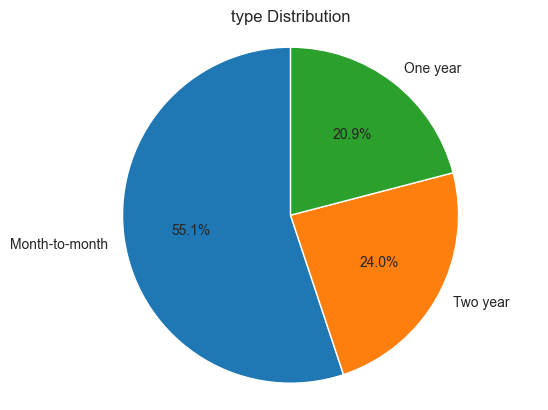

In [30]:
plot_pie_chart(contract_new, 'type')

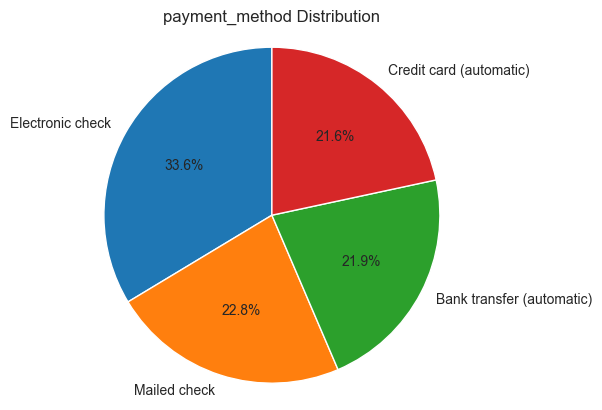

In [31]:
plot_pie_chart(contract_new,'payment_method')

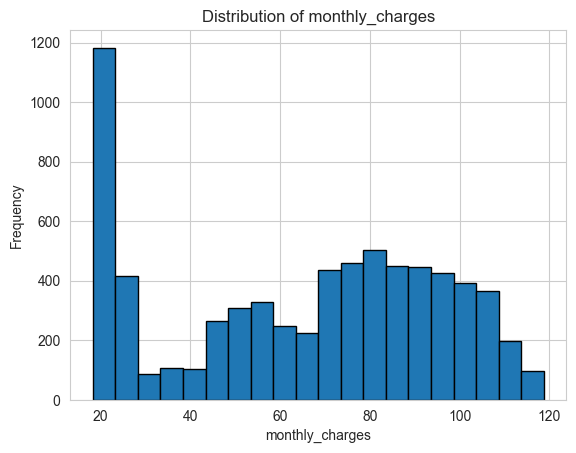

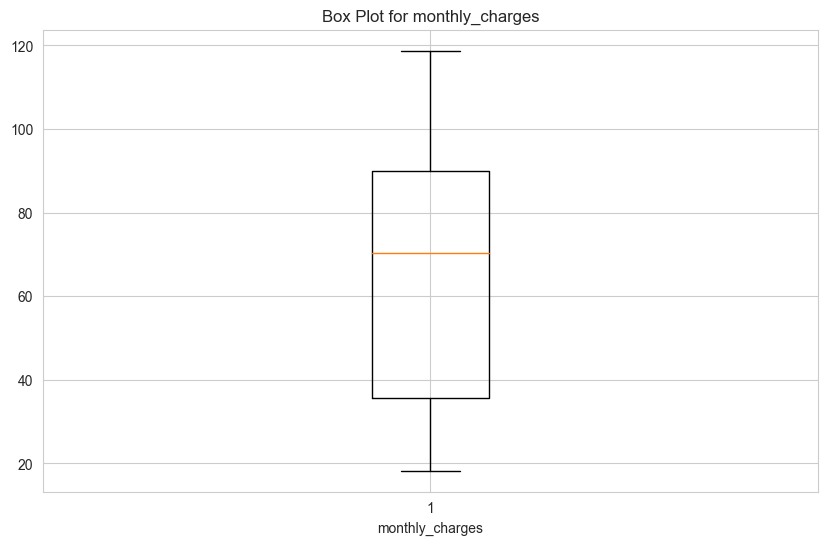

In [32]:
plot_histogram(contract_new, 'monthly_charges')
build_box_plot(contract_new, 'monthly_charges')

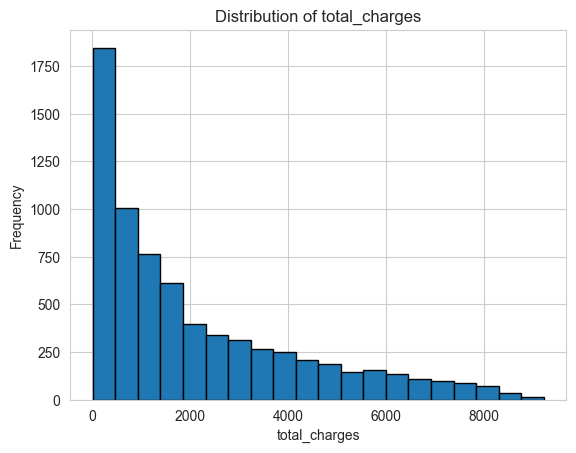

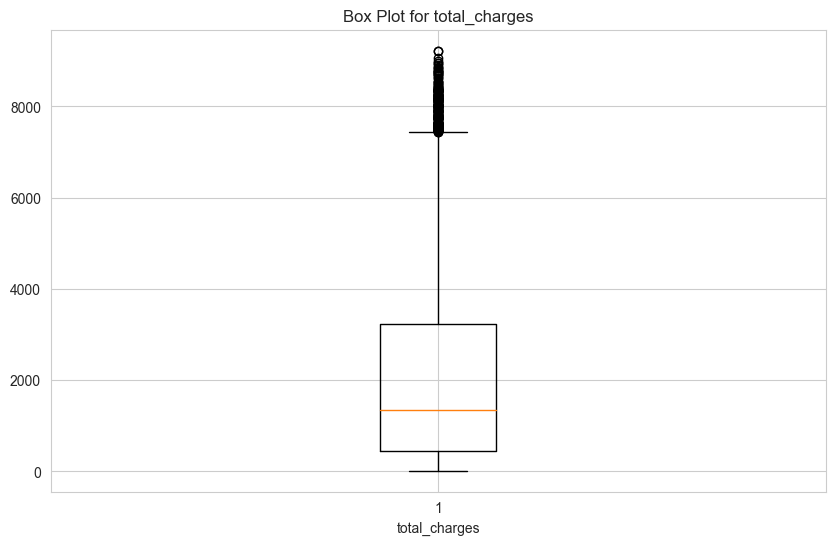

In [33]:
plot_histogram(contract_new, 'total_charges')
build_box_plot(contract_new, 'total_charges')

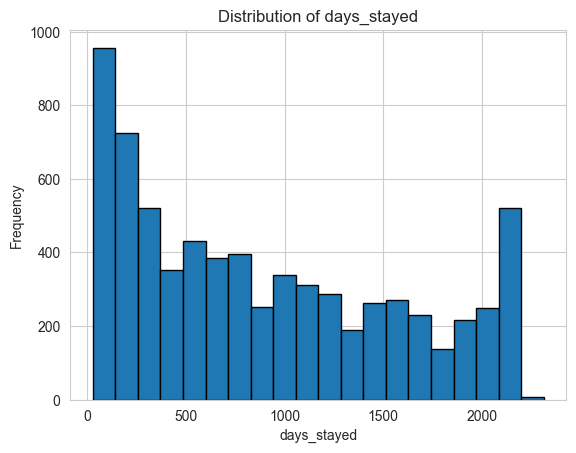

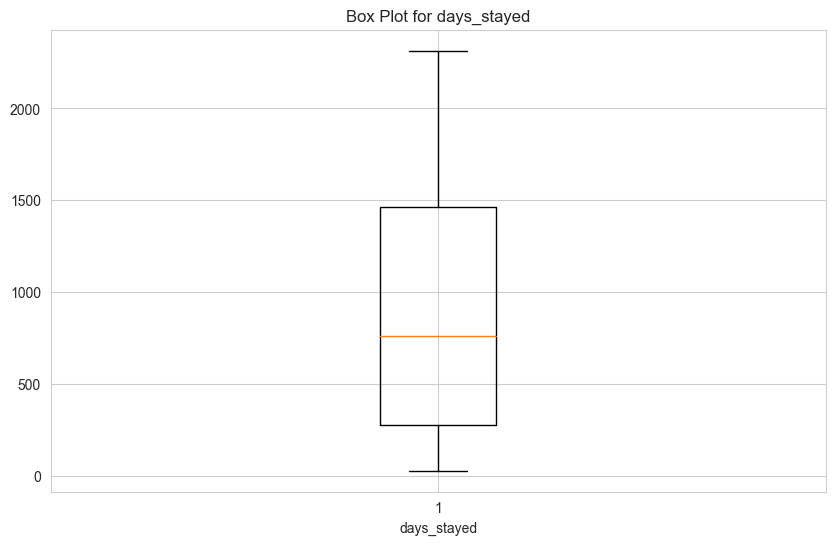

In [34]:
plot_histogram(contract_new, 'days_stayed')
build_box_plot(contract_new, 'days_stayed')

### Conclusions on EDA on contract_new

1. Got Target.
2. Added new feature(How many days client was signed)
3. Deleted End Date and Begin Date

### Internet_new

In [35]:
internet_new

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [36]:
internet_new.columns = to_snake_case(internet_new.columns)
internet_new

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


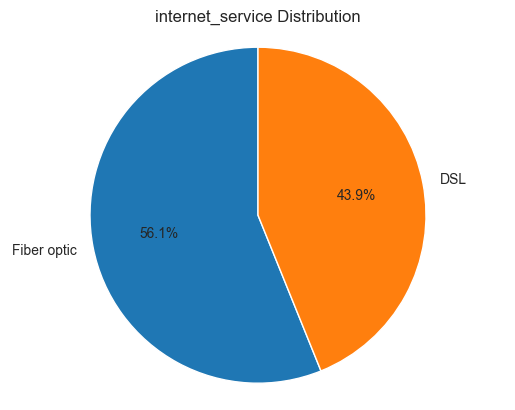

In [37]:
plot_pie_chart(internet_new,'internet_service')

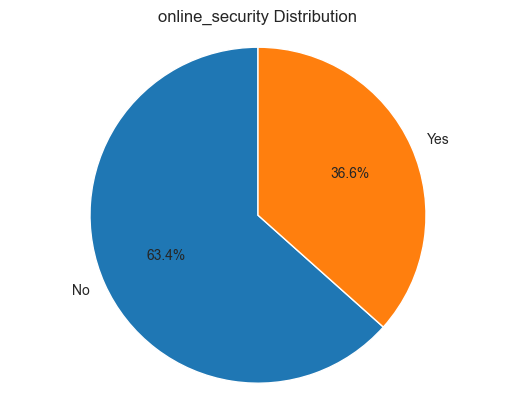

In [38]:
plot_pie_chart(internet_new, 'online_security')

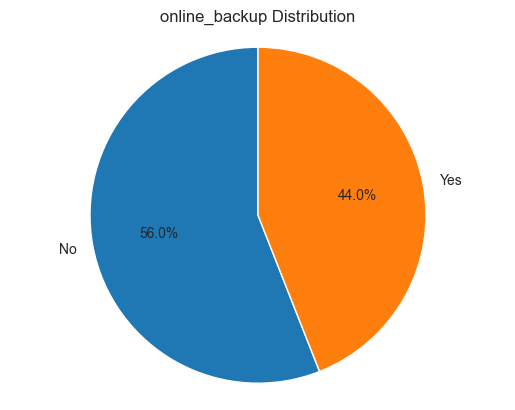

In [39]:
plot_pie_chart(internet_new, 'online_backup')

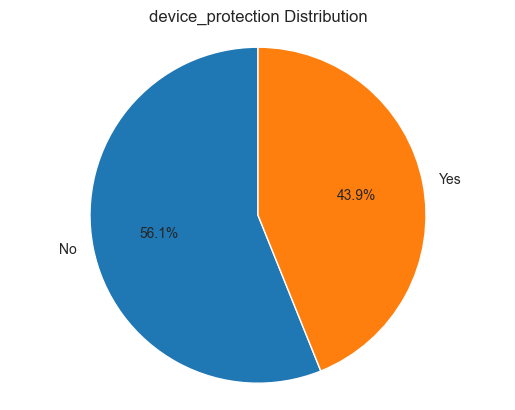

In [40]:
plot_pie_chart(internet_new,'device_protection')

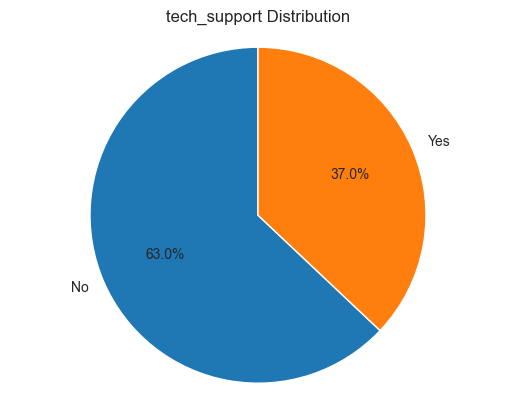

In [41]:
plot_pie_chart(internet_new, 'tech_support')

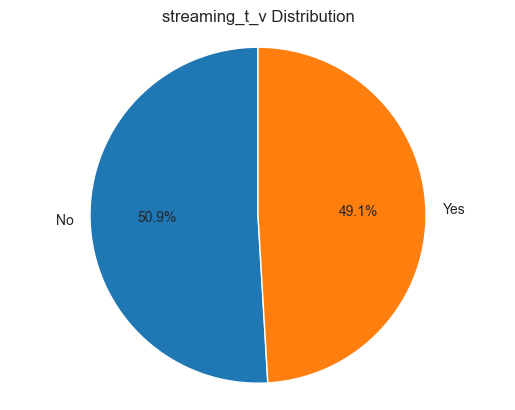

In [42]:
plot_pie_chart(internet_new, 'streaming_t_v')

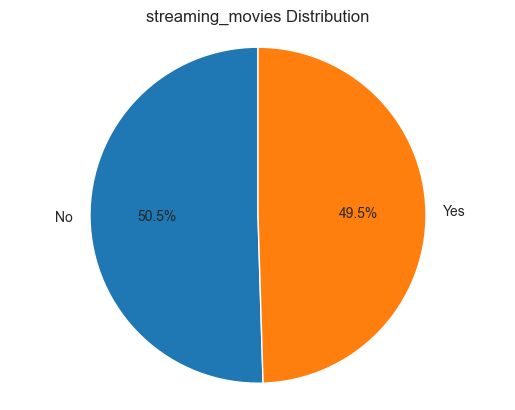

In [43]:
plot_pie_chart(internet_new, 'streaming_movies')

### Conclusions on internet_new

Data preprocessing is not needed

### Phone_new

In [44]:
phone_new

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [45]:
phone_new.columns = to_snake_case(phone_new.columns)
phone_new

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


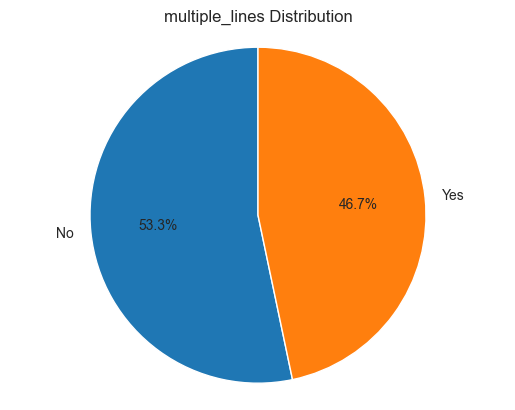

In [46]:
plot_pie_chart(phone_new, 'multiple_lines')

#### Conclusions on Phone_new

Data preprocessing is not needed

## Personal_new

In [47]:
personal_new

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [48]:
personal_new.columns = to_snake_case(personal_new.columns)
personal_new

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


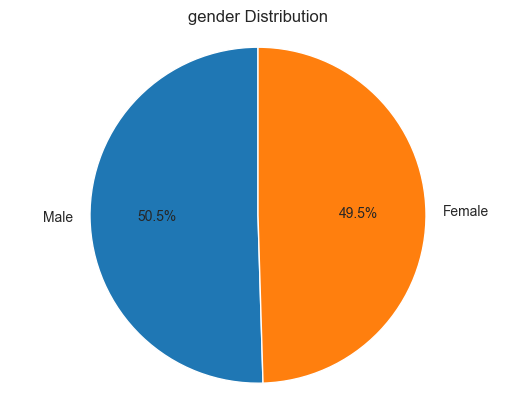

In [49]:
plot_pie_chart(personal_new,'gender')

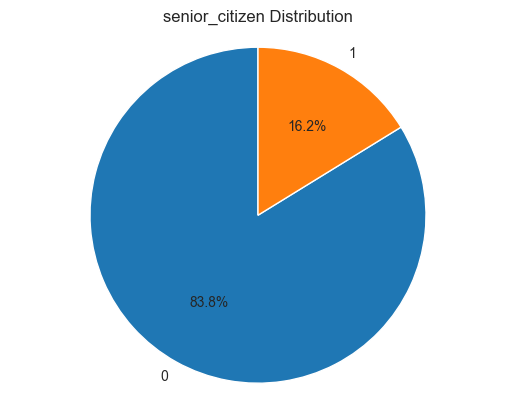

In [50]:
plot_pie_chart(personal_new,'senior_citizen')

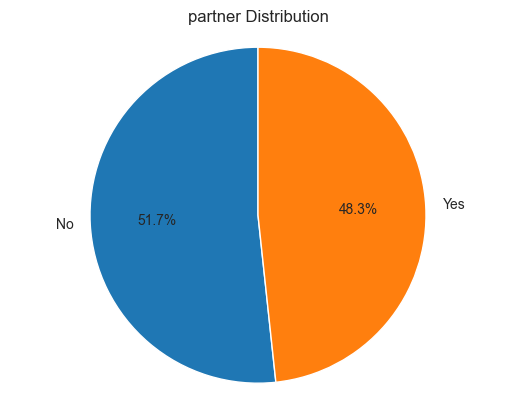

In [51]:
plot_pie_chart(personal_new, 'partner')

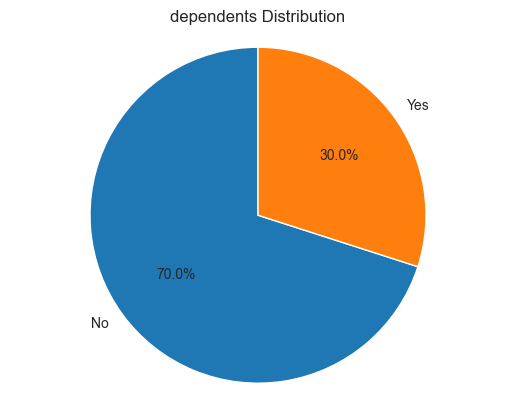

In [52]:
plot_pie_chart(personal_new, 'dependents')

### Conclusions on personal_new

Data preprocessing is not needed

## Merging data

In [53]:
data = contract_new.merge(right=personal_new, on='customer_id', validate='one_to_one')
data

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,days_stayed,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,One year,Yes,Mailed check,84.80,2035.20,0,730,Male,0,Yes,Yes
7028,2234-XADUH,One year,Yes,Credit card (automatic),103.20,7430.40,0,2191,Female,0,Yes,Yes
7029,4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,325.60,0,337,Female,0,Yes,Yes
7030,8361-LTMKD,Month-to-month,Yes,Mailed check,74.40,520.80,0,215,Male,1,Yes,No


In [54]:
data = data.merge(right=internet_new, how='left', on='customer_id')
data

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,days_stayed,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,One year,Yes,Mailed check,84.80,2035.20,0,730,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7028,2234-XADUH,One year,Yes,Credit card (automatic),103.20,7430.40,0,2191,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7029,4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,325.60,0,337,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No
7030,8361-LTMKD,Month-to-month,Yes,Mailed check,74.40,520.80,0,215,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No


In [55]:
data = data.merge(right=phone_new, on='customer_id', how='left')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   type               7032 non-null   object 
 2   paperless_billing  7032 non-null   object 
 3   payment_method     7032 non-null   object 
 4   monthly_charges    7032 non-null   float64
 5   total_charges      7032 non-null   float64
 6   churn              7032 non-null   int64  
 7   days_stayed        7032 non-null   int64  
 8   gender             7032 non-null   object 
 9   senior_citizen     7032 non-null   int64  
 10  partner            7032 non-null   object 
 11  dependents         7032 non-null   object 
 12  internet_service   5512 non-null   object 
 13  online_security    5512 non-null   object 
 14  online_backup      5512 non-null   object 
 15  device_protection  5512 non-null   object 
 16  tech_support       5512 

## Preprocessing data after merging


In [57]:
data['internet_service'] = data['internet_service'].fillna('No internet')

In [58]:
data['internet_service'].value_counts()

internet_service
Fiber optic    3096
DSL            2416
No internet    1520
Name: count, dtype: int64

In [59]:
data = data.fillna('No')

In [60]:
data

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,days_stayed,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,One year,Yes,Mailed check,84.80,2035.20,0,730,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7028,2234-XADUH,One year,Yes,Credit card (automatic),103.20,7430.40,0,2191,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7029,4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,325.60,0,337,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No
7030,8361-LTMKD,Month-to-month,Yes,Mailed check,74.40,520.80,0,215,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [61]:
data['senior_citizen'] = data['senior_citizen'].replace({0: 'No', 1: 'Yes'})

In [62]:
data

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,days_stayed,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,One year,Yes,Mailed check,84.80,2035.20,0,730,Male,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7028,2234-XADUH,One year,Yes,Credit card (automatic),103.20,7430.40,0,2191,Female,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7029,4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,325.60,0,337,Female,No,Yes,Yes,DSL,Yes,No,No,No,No,No,No
7030,8361-LTMKD,Month-to-month,Yes,Mailed check,74.40,520.80,0,215,Male,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [63]:
data.isna().sum()

customer_id          0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
days_stayed          0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_t_v        0
streaming_movies     0
multiple_lines       0
dtype: int64

### EDA

In [64]:
data.phik_matrix(interval_cols=['monthly_charges', 'total_charges', 'days_stayed'])

/Users/jackthelad/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable customer_id is large: 7032. Are you sure this is not an interval variable? Analysis for pairs of variables including customer_id can be slow.
  warnings.warn(


,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,days_stayed,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customer_id,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
type,1.0,1.000000,0.106151,0.277528,0.388557,0.470700,0.094622,0.635623,0.000000,0.085800,0.179294,0.146126,0.503776,0.152239,0.099016,0.137817,0.180169,0.067123,0.070375,0.065750
paperless_billing,1.0,0.106151,1.000000,0.368945,0.467547,0.202168,0.082789,0.018839,0.000000,0.241715,0.010489,0.170650,0.231145,0.000000,0.196937,0.161234,0.055354,0.344114,0.325351,0.253299
payment_method,1.0,0.277528,0.368945,1.000000,0.398849,0.334563,0.214300,0.348275,0.000000,0.291989,0.244661,0.222859,0.323013,0.261704,0.282245,0.306678,0.270893,0.377241,0.378375,0.339987
monthly_charges,1.0,0.388557,0.467547,0.398849,1.000000,0.711015,0.225823,0.387649,0.005522,0.304546,0.204575,0.182283,0.919005,0.550855,0.629276,0.667621,0.576163,0.835680,0.833111,0.676393
total_charges,1.0,0.470700,0.202168,0.334563,0.711015,1.000000,0.303758,0.847572,0.000000,0.136856,0.383135,0.085809,0.489363,0.522660,0.623588,0.642431,0.550988,0.642937,0.644346,0.573224
churn,1.0,0.094622,0.082789,0.214300,0.225823,0.303758,1.000000,0.374101,0.008800,0.085708,0.227597,0.048710,0.056279,0.132914,0.229736,0.218622,0.103933,0.200334,0.221756,0.261345
days_stayed,1.0,0.635623,0.018839,0.348275,0.387649,0.847572,0.374101,1.000000,0.000000,0.065128,0.450246,0.197317,0.058903,0.394666,0.416097,0.429177,0.403311,0.340939,0.338454,0.397584
gender,1.0,0.000000,0.000000,0.000000,0.005522,0.000000,0.008800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.016788,0.007277,0.000000,0.000000,0.000000,0.000000,0.000000
senior_citizen,1.0,0.085800,0.241715,0.291989,0.304546,0.136856,0.085708,0.065128,0.000000,1.000000,0.018075,0.323629,0.160452,0.056897,0.102206,0.090818,0.092485,0.163223,0.185621,0.221386


/Users/jackthelad/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable customer_id is large: 7032. Are you sure this is not an interval variable? Analysis for pairs of variables including customer_id can be slow.
  warnings.warn(


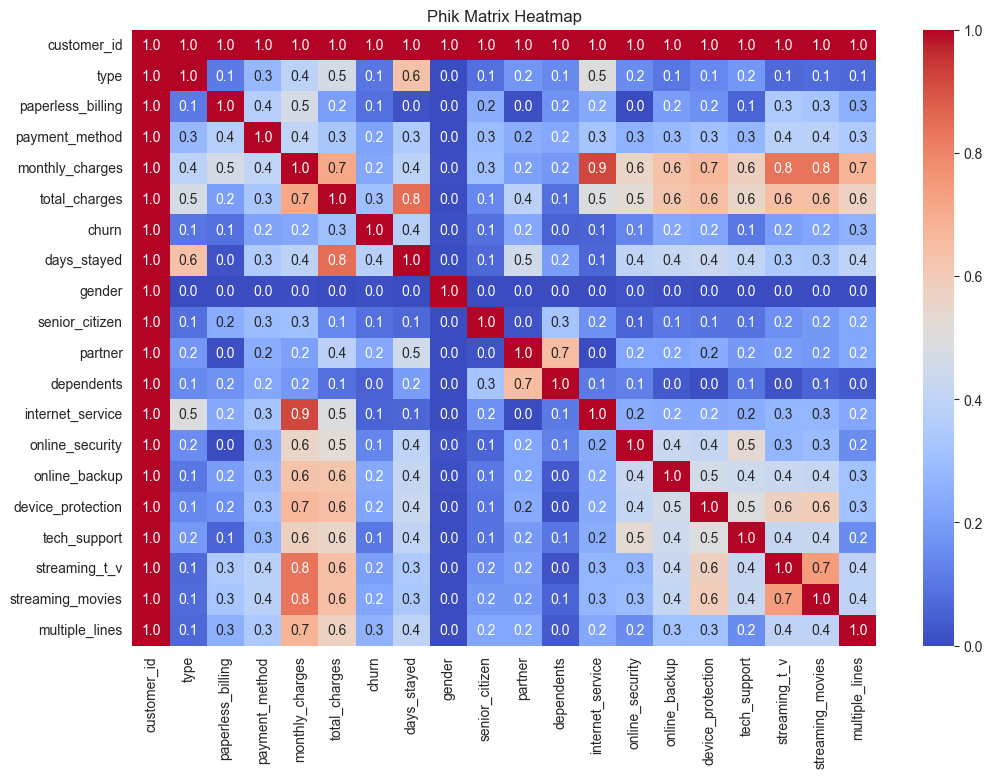

In [65]:
phik_matrix = data.phik_matrix(interval_cols=['monthly_charges', 'total_charges', 'days_stayed'])

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Phik Matrix Heatmap')
plt.show()

/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='days_stayed', ylabel='Count'>

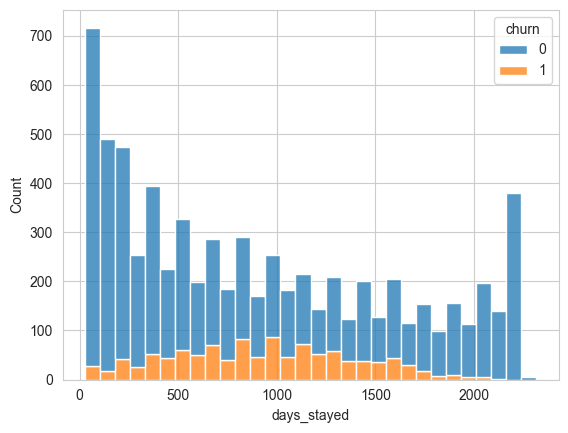

In [66]:
sns.histplot(data, x='days_stayed', hue='churn', multiple="stack", bins=30)

/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='monthly_charges', ylabel='Count'>

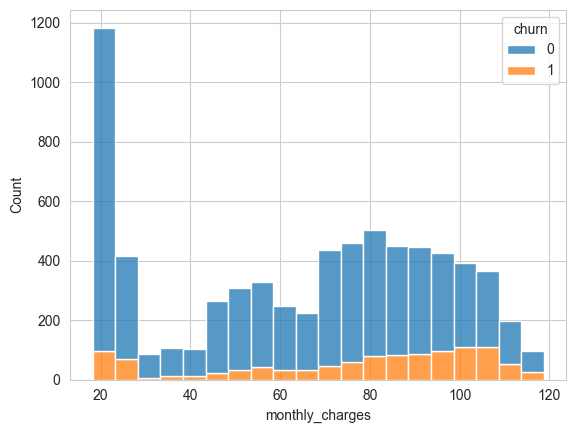

In [67]:
sns.histplot(data, x='monthly_charges', hue='churn', multiple="stack", bins=20)

/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackthelad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='total_charges', ylabel='Count'>

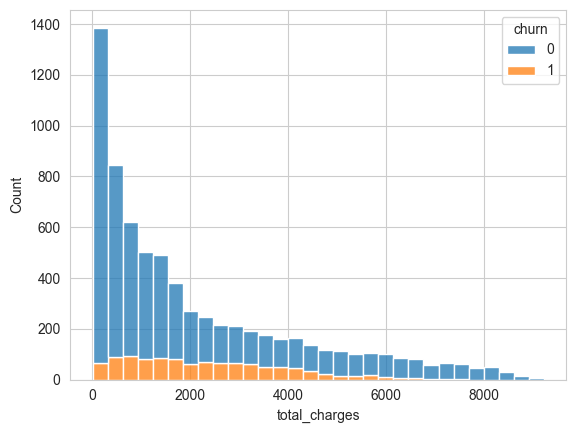

In [68]:
sns.histplot(data, x='total_charges', hue='churn', multiple="stack", bins=30)

In [69]:
X = data.drop(columns=['churn', 'customer_id'])
y = data['churn']
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (7032, 18)
Shape of y: (7032,)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=301023, stratify=y)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (5274, 18)
y_train shape: (5274,)
X_test shape: (1758, 18)
y_test shape: (1758,)


In [71]:
X_train

,type,paperless_billing,payment_method,monthly_charges,total_charges,days_stayed,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
1511,Month-to-month,No,Electronic check,92.60,1684.39,518,Female,No,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Yes
942,Month-to-month,No,Bank transfer (automatic),74.40,375.72,153,Female,No,No,No,Fiber optic,No,No,No,No,No,No,Yes
4644,One year,Yes,Credit card (automatic),19.65,497.15,702,Female,No,No,No,No internet,No,No,No,No,No,No,No
1008,Two year,No,Mailed check,58.65,4164.15,2163,Female,No,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,No
653,Month-to-month,No,Electronic check,19.65,176.85,276,Female,Yes,No,No,No internet,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,Month-to-month,Yes,Electronic check,85.30,341.20,123,Male,No,No,No,Fiber optic,No,No,No,No,No,Yes,Yes
4075,One year,No,Electronic check,84.35,2530.50,913,Male,No,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
1312,Month-to-month,Yes,Mailed check,19.95,139.65,215,Male,No,No,No,No internet,No,No,No,No,No,No,No
6214,Month-to-month,Yes,Electronic check,69.00,690.00,306,Female,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,No


In [72]:
cat_columns = ['paperless_billing', 'gender', 'senior_citizen', 'partner', 'dependents', 'online_security', 'online_backup', 'device_protection',
               'tech_support', 'streaming_t_v', 'streaming_movies', 'internet_service', 'multiple_lines', 'type', 'payment_method']
num_columns = ['monthly_charges', 'total_charges', 'days_stayed']

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(drop='first',  handle_unknown='error'), cat_columns),
    ],
    remainder='passthrough'
)

## ML models

### Logistic Regression

In [74]:
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

log_reg_param_grid = {
    'classifier__C': np.arange(4,6,0.5)
}


In [75]:
log_reg_grid_search = GridSearchCV(estimator=log_reg_pipeline,
                                   param_grid=log_reg_param_grid,
                                   cv=5,
                                   scoring=['roc_auc','accuracy'],
                                   n_jobs=-1,
                                   refit='roc_auc',
                                   verbose=3,
                                   return_train_score=True,
                                   error_score='raise')

In [76]:
log_reg_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['monthly_charges',
                                                                          'total_charges',
                                                                          'days_stayed']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['paperless_billing',
                                                                          'gender',
                                                                          'senior_citizen',
                                                                          'partner',
                                                                          'dependents',
                                                                          'online_security',
                                                                          'online_backup',
                                                                          'device_protection',
                                                                          'tech_support',
                                                                          'streaming_t_v',
                                                                          'streaming_movies',
                                                                          'internet_service',
                                                                          'multiple_lines',
                                                                          'type',
                                                                          'payment_method'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([4. , 4.5, 5. , 5.5])},
             refit='roc_auc', return_train_score=True,
             scoring=['roc_auc', 'accuracy'], verbose=3)

In [77]:
log_reg_best_est = log_reg_grid_search.best_estimator_
log_reg_best_est

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'days_stayed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['paperless_billing',
                                                   'gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_t_v',
                                                   'streaming_movies',
                                                   'internet_service',
                                                   'multiple_lines', 'type',
                                                   'payment_method'])])),
                ('classifier',
                 LogisticRegression(C=5.0, class_weight='balanced'))])

In [78]:
log_reg_score = log_reg_grid_search.best_score_
log_reg_score

0.7688573777029364

## DecisionTreeClassifier

In [79]:
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [80]:
tree_param_grid = {
    'classifier__max_depth': np.arange(3, 6, 1),
    'classifier__min_samples_split': np.arange(50, 70, 5),
    'classifier__min_samples_leaf': np.arange(75, 100, 5),
}

In [81]:
decision_tree_grid_search = GridSearchCV(
    estimator=tree_pipeline,
    param_grid=tree_param_grid,
    cv=5,
    scoring=['roc_auc','accuracy'],
    n_jobs=-1,
    refit='roc_auc',
    verbose=3,
    return_train_score=True
)

In [82]:
decision_tree_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['monthly_charges',
                                                                          'total_charges',
                                                                          'days_stayed']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['paperless_billing',
                                                                          'gender',
                                                                          'senior_citizen',
                                                                          'partner',
                                                                          'dependents',
                                                                          'online_security',
                                                                          'online_backup',
                                                                          'device_protection',...
                                                                          'internet_service',
                                                                          'multiple_lines',
                                                                          'type',
                                                                          'payment_method'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': array([3, 4, 5]),
                         'classifier__min_samples_leaf': array([75, 80, 85, 90, 95]),
                         'classifier__min_samples_split': array([50, 55, 60, 65])},
             refit='roc_auc', return_train_score=True,
             scoring=['roc_auc', 'accuracy'], verbose=3)

In [83]:
decision_tree_best_est = decision_tree_grid_search.best_estimator_
decision_tree_best_est

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'days_stayed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['paperless_billing',
                                                   'gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_t_v',
                                                   'streaming_movies',
                                                   'internet_service',
                                                   'multiple_lines', 'type',
                                                   'payment_method'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=80,
                                        min_samples_split=60))])

In [84]:
decision_tree_score = decision_tree_grid_search.best_score_
decision_tree_score

0.78530944366414

### KNeighborsClassifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [87]:
knc_param_grid = {
    'classifier__n_neighbors': range(100,150,5),
    'classifier__weights': ['uniform', 'distance']
}

In [88]:
knc_grid_search = GridSearchCV(estimator=knc_pipeline,
                               param_grid=knc_param_grid,
                               verbose=3,
                               cv=5,
                               scoring=['roc_auc', 'accuracy'],
                               refit='roc_auc',
                               n_jobs=-1)

In [89]:
knc_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['monthly_charges',
                                                                          'total_charges',
                                                                          'days_stayed']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['paperless_billing',
                                                                          'gender',
                                                                          'senior_citizen',
                                                                          'partner',
                                                                          'dependents',
                                                                          'online_security',
                                                                          'online_backup',
                                                                          'device_protection',
                                                                          'tech_support',
                                                                          'streaming_t_v',
                                                                          'streaming_movies',
                                                                          'internet_service',
                                                                          'multiple_lines',
                                                                          'type',
                                                                          'payment_method'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': range(100, 150, 5),
                         'classifier__weights': ['uniform', 'distance']},
             refit='roc_auc', scoring=['roc_auc', 'accuracy'], verbose=3)

In [90]:
knc_grid_search.best_score_

0.797487588710825

In [91]:
knc_grid_search.best_params_

{'classifier__n_neighbors': 125, 'classifier__weights': 'distance'}

### Catboost

In [92]:
catboost = CatBoostClassifier(loss_function='Logloss',
                              eval_metric='AUC',
                              cat_features=cat_columns)

In [93]:
catboost_param = {
    'iterations': [150, 200,250],
    'depth': [4,5, 6],
    'learning_rate': [0.15, 0.1, 0.2,0.25]
}

In [94]:
catboost_grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=catboost_param,
    cv=5,
    scoring=['roc_auc','accuracy'],
    refit='roc_auc',
    n_jobs=-1,
    verbose=5,
    return_train_score=True

)

In [95]:
catboost_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 2/5] END classifier__C=4.5; accuracy: (train=0.705, test=0.681) roc_auc: (train=0.781, test=0.753) total time=   0.3s
[CV 1/5] END classifier__C=5.5; accuracy: (train=0.699, test=0.707) roc_auc: (train=0.772, test=0.790) total time=   0.3s
[CV 2/5] END classifier__max_depth=3, classifier__min_samples_leaf=75, classifier__min_samples_split=50; accuracy: (train=0.853, test=0.850) roc_auc: (train=0.760, test=0.727) total time=   0.2s
[CV 1/5] END classifier__max_depth=3, classifier__min_samples_leaf=75, classifier__min_samples_split=60; accuracy: (train=0.843, test=0.844) roc_auc: (train=0.754, test=0.762) total time=   0.1s
[CV 4/5] END classifier__max_depth=3, classifier__min_samples_leaf=75, classifier__min_samples_split=65; accuracy: (train=0.854, test=0.845) roc_auc: (train=0.758, test=0.733) total time=   0.2s
[CV 5/5] END classifier__max_depth=3, classifier__min_samples_leaf=80, classifier__min_samples_split=50; accu

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x132b9fcd0>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6], 'iterations': [150, 200, 250],
                         'learning_rate': [0.15, 0.1, 0.2, 0.25]},
             refit='roc_auc', return_train_score=True,
             scoring=['roc_auc', 'accuracy'], verbose=5)

In [96]:
catboost_grid_search.best_score_

0.9110647535801814

In [97]:
catboost_grid_search.best_params_

{'depth': 4, 'iterations': 250, 'learning_rate': 0.25}

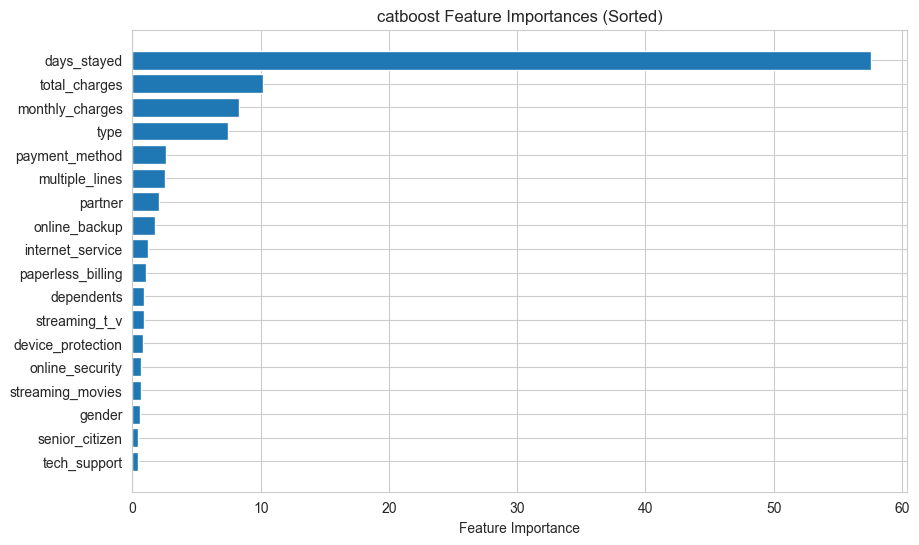

In [98]:
feature_importances = catboost_grid_search.best_estimator_.feature_importances_

sorted_indices = feature_importances.argsort()
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Feature Importance')
plt.title('catboost Feature Importances (Sorted)')
plt.show()

## Model Selection

In [99]:
catboost_model = CatBoostClassifier(**catboost_grid_search.best_params_, loss_function='Logloss', eval_metric='AUC', cat_features=cat_columns)

In [100]:
catboost_model.fit(X_train, y_train)

0:	total: 4.15ms	remaining: 1.03s
1:	total: 8.85ms	remaining: 1.1s
2:	total: 12.6ms	remaining: 1.04s
3:	total: 17.1ms	remaining: 1.05s
4:	total: 20.8ms	remaining: 1.02s
5:	total: 24.4ms	remaining: 992ms
6:	total: 27.9ms	remaining: 970ms
7:	total: 31.7ms	remaining: 959ms
8:	total: 35.3ms	remaining: 946ms
9:	total: 39.1ms	remaining: 937ms
10:	total: 43ms	remaining: 934ms
11:	total: 46.8ms	remaining: 928ms
12:	total: 49.9ms	remaining: 909ms
13:	total: 53.9ms	remaining: 908ms
14:	total: 57.7ms	remaining: 904ms
15:	total: 62.1ms	remaining: 908ms
16:	total: 66.1ms	remaining: 905ms
17:	total: 69.5ms	remaining: 895ms
18:	total: 73.2ms	remaining: 890ms
19:	total: 76.6ms	remaining: 881ms
20:	total: 81ms	remaining: 883ms
21:	total: 84.9ms	remaining: 879ms
22:	total: 89.2ms	remaining: 880ms
23:	total: 93.1ms	remaining: 876ms
24:	total: 96.4ms	remaining: 868ms
25:	total: 101ms	remaining: 869ms
26:	total: 106ms	remaining: 873ms
27:	total: 111ms	remaining: 876ms
28:	total: 115ms	remaining: 873ms
29:	

In [101]:
y_pred = catboost_model.predict_proba(X_test)[:,1]

In [102]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.9265285355238153

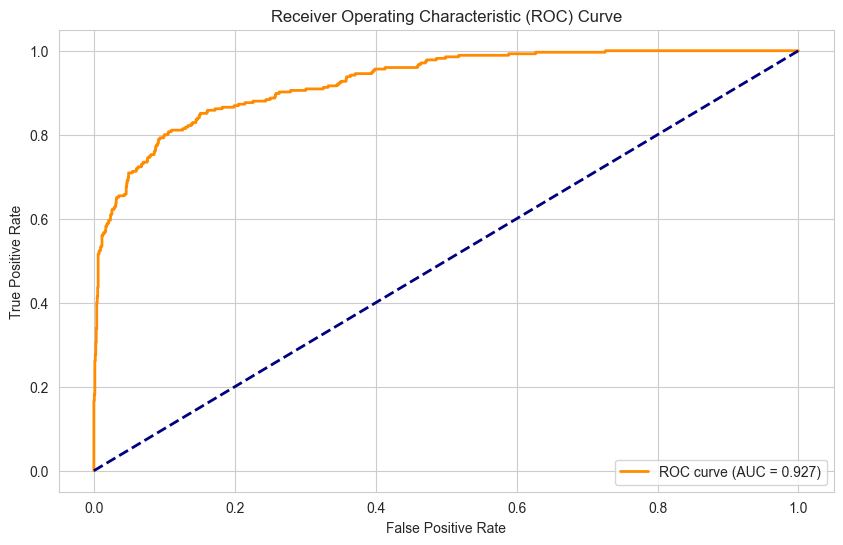

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Conclusions


1) Logistic regression: ROC-AUC = 0.768
2) DecisionTreeClassifier: ROC-AUC = 0.785
3) KNNeighborsClassifier: ROC-AUC = 0.797
4) CatBoostClassifier: ROC-AUC = 0.911

Choose the best model - catboost with ROC-AUC = 0.911
